In [1]:
import pandas as pd

In [2]:
H = pd.read_csv("hofmarcher_results.csv")
H = H.reset_index()
H["index"] = H["index"]+1
H

,index,Assay,ResNet,DenseNet,GapNet,M-CNN,MIL-Net,SC-CNN,FNN
0,1,CHEMBL1040691,0.382,0.354,0.400,0.344,0.336,0.390,0.546
1,2,CHEMBL1614544,0.714,0.687,0.679,0.722,0.725,0.616,0.606
2,3,CHEMBL1613914,0.544,0.534,0.511,0.547,0.508,0.565,0.402
3,4,CHEMBL1613836,0.492,0.466,0.448,0.461,0.503,0.401,0.511
4,5,CHEMBL1613838,0.436,0.496,0.434,0.480,0.552,0.491,0.578
...,...,...,...,...,...,...,...,...,...
204,205,CHEMBL3214913,0.839,0.881,0.856,0.764,0.731,0.799,0.623
205,206,CHEMBL3214967,0.761,0.822,0.856,0.719,0.670,0.739,0.708
206,207,CHEMBL3214906,0.562,0.650,0.547,0.482,0.574,0.550,0.483
207,208,CHEMBL3214970,0.828,0.812,0.801,0.719,0.721,0.716,0.584


In [3]:
columnsindex = pd.read_csv("data/column-assay-index.csv").reset_index()
columnsindex["index"] = columnsindex["index"]+1
columnsindex

,index,ASSAY_ID,CHEMBL_ID
0,1,600885,CHEMBL1040691
1,2,688422,CHEMBL1614544
2,3,688493,CHEMBL1613914
3,4,688810,CHEMBL1613836
4,5,688812,CHEMBL1613838
...,...,...,...
204,205,1301866,CHEMBL3214913
205,206,1301890,CHEMBL3214967
206,207,1301859,CHEMBL3214906
207,208,1301893,CHEMBL3214970


In [4]:
H.Assay.to_list()==columnsindex.CHEMBL_ID.to_list()

True

In [5]:
S = pd.read_csv("scaffold_mean_AUCSeal_individualmodels.csv").rename(columns={"AUC": "Cell Count"})
S

,Unnamed: 0,Task,Cell Count
0,0,1,0.550831
1,1,10,0.445697
2,2,100,0.910435
3,3,101,0.972066
4,4,102,0.853547
...,...,...,...
204,204,95,0.901316
205,205,96,0.888889
206,206,97,0.916667
207,207,98,0.912464


In [6]:
results = pd.merge(H, S, left_on="index", right_on="Task")
results = results= results[['Task', 'Cell Count', 'ResNet', 'DenseNet', 
                            'GapNet', 'M-CNN', 'MIL-Net','SC-CNN', 'FNN' ]]
results

,Task,Cell Count,ResNet,DenseNet,GapNet,M-CNN,MIL-Net,SC-CNN,FNN
0,1,0.550831,0.382,0.354,0.400,0.344,0.336,0.390,0.546
1,2,0.441415,0.714,0.687,0.679,0.722,0.725,0.616,0.606
2,3,0.809348,0.544,0.534,0.511,0.547,0.508,0.565,0.402
3,4,0.510897,0.492,0.466,0.448,0.461,0.503,0.401,0.511
4,5,0.508333,0.436,0.496,0.434,0.480,0.552,0.491,0.578
...,...,...,...,...,...,...,...,...,...
204,205,0.664955,0.839,0.881,0.856,0.764,0.731,0.799,0.623
205,206,0.486700,0.761,0.822,0.856,0.719,0.670,0.739,0.708
206,207,0.642857,0.562,0.650,0.547,0.482,0.574,0.550,0.483
207,208,0.633442,0.828,0.812,0.801,0.719,0.721,0.716,0.584


In [11]:
assay = pd.read_csv("../The_Cell_Count_Files/detailed_assaytypedata_hofmarcher.csv")
assay = assay[["Assay", "Assay_Type", "Assay_Description", "Target_Type", "Target_Name", "Organism", "Gene_Symbol"]].drop_duplicates().reset_index(drop=True)
assay

,Assay,Assay_Type,Assay_Description,Target_Type,Target_Name,Organism,Gene_Symbol
0,1,F,NOVARTIS: Inhibition of Plasmodium falciparum ...,ORGANISM,Plasmodium falciparum,Plasmodium falciparum,Unknown
1,2,F,PUBCHEM_BIOASSAY: qHTS Assay for Modulators of...,SINGLE PROTEIN,Prelamin-A/C,Homo sapiens,LMNA
2,3,F,PUBCHEM_BIOASSAY: qHTS Assay for Inhibitors of...,SINGLE PROTEIN,Lysine-specific demethylase 4D-like,Homo sapiens,KDM4E
3,4,F,PUBCHEM_BIOASSAY: qHTS Assay for Modulators of...,NUCLEIC-ACID,microRNA 21,Homo sapiens,NaN
4,5,F,PUBCHEM_BIOASSAY: qHTS Assay for Rab9 Promoter...,SINGLE PROTEIN,Ras-related protein Rab-9A,Homo sapiens,RAB9A
...,...,...,...,...,...,...,...
204,205,B,PubChem BioAssay. qHTS for Inhibitors of bindi...,UNCHECKED,Unchecked,NaN,Unknown
205,206,F,PubChem BioAssay. qHTS for Antagonist of cAMP-...,SINGLE PROTEIN,Rap guanine nucleotide exchange factor 3,Homo sapiens,RAPGEF3
206,207,F,PubChem BioAssay. qHTS for Agonist of cAMP-reg...,SINGLE PROTEIN,Rap guanine nucleotide exchange factor 4,Homo sapiens,RAPGEF4
207,208,F,PubChem BioAssay. qHTS Assay for Identifying G...,UNCHECKED,Unchecked,NaN,Unknown


In [28]:
detailed_results= pd.merge(results, assay, left_on="Task", right_on="Assay")
detailed_results

,Task,Cell Count,ResNet,DenseNet,GapNet,M-CNN,MIL-Net,SC-CNN,FNN,Assay,Assay_Type,Assay_Description,Target_Type,Target_Name,Organism,Gene_Symbol
0,1,0.550831,0.382,0.354,0.400,0.344,0.336,0.390,0.546,1,F,NOVARTIS: Inhibition of Plasmodium falciparum ...,ORGANISM,Plasmodium falciparum,Plasmodium falciparum,Unknown
1,2,0.441415,0.714,0.687,0.679,0.722,0.725,0.616,0.606,2,F,PUBCHEM_BIOASSAY: qHTS Assay for Modulators of...,SINGLE PROTEIN,Prelamin-A/C,Homo sapiens,LMNA
2,3,0.809348,0.544,0.534,0.511,0.547,0.508,0.565,0.402,3,F,PUBCHEM_BIOASSAY: qHTS Assay for Inhibitors of...,SINGLE PROTEIN,Lysine-specific demethylase 4D-like,Homo sapiens,KDM4E
3,4,0.510897,0.492,0.466,0.448,0.461,0.503,0.401,0.511,4,F,PUBCHEM_BIOASSAY: qHTS Assay for Modulators of...,NUCLEIC-ACID,microRNA 21,Homo sapiens,NaN
4,5,0.508333,0.436,0.496,0.434,0.480,0.552,0.491,0.578,5,F,PUBCHEM_BIOASSAY: qHTS Assay for Rab9 Promoter...,SINGLE PROTEIN,Ras-related protein Rab-9A,Homo sapiens,RAB9A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,205,0.664955,0.839,0.881,0.856,0.764,0.731,0.799,0.623,205,B,PubChem BioAssay. qHTS for Inhibitors of bindi...,UNCHECKED,Unchecked,NaN,Unknown
205,206,0.486700,0.761,0.822,0.856,0.719,0.670,0.739,0.708,206,F,PubChem BioAssay. qHTS for Antagonist of cAMP-...,SINGLE PROTEIN,Rap guanine nucleotide exchange factor 3,Homo sapiens,RAPGEF3
206,207,0.642857,0.562,0.650,0.547,0.482,0.574,0.550,0.483,207,F,PubChem BioAssay. qHTS for Agonist of cAMP-reg...,SINGLE PROTEIN,Rap guanine nucleotide exchange factor 4,Homo sapiens,RAPGEF4
207,208,0.633442,0.828,0.812,0.801,0.719,0.721,0.716,0.584,208,F,PubChem BioAssay. qHTS Assay for Identifying G...,UNCHECKED,Unchecked,NaN,Unknown


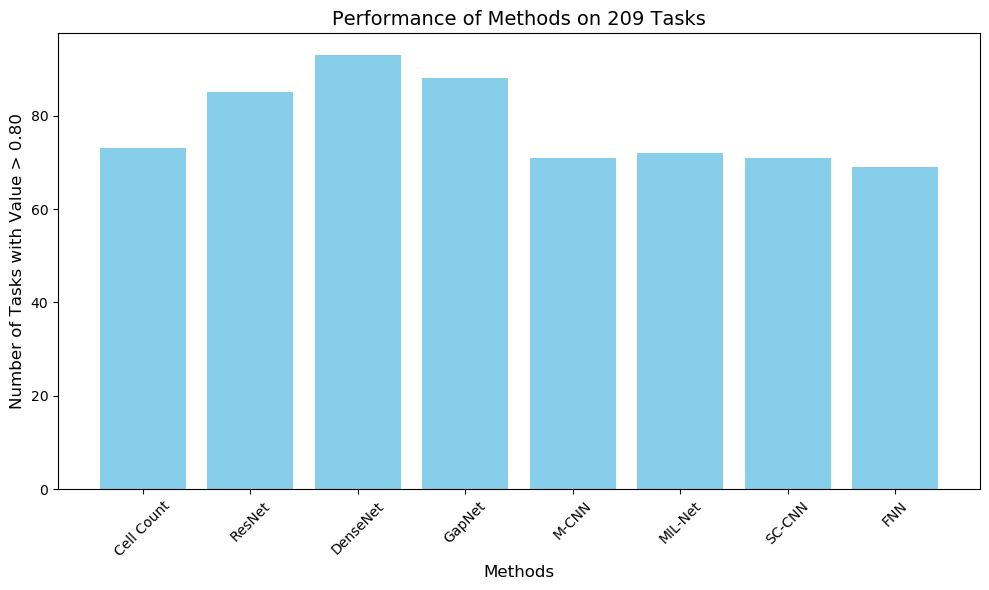

In [43]:
# List of methods to analyze
methods = ['Cell Count', 'ResNet', 'DenseNet', 'GapNet', 'M-CNN', 'MIL-Net', 'SC-CNN', 'FNN']

# Initialize a dictionary to store counts of tasks with value > 0.80
counts = {}

for method in methods:
    counts[method] = (detailed_results[method] > 0.80).sum()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(counts.keys(), counts.values(), color='skyblue')
plt.xlabel('Methods', fontsize=12)
plt.ylabel('Number of Tasks with Value > 0.80', fontsize=12)
plt.title('Performance of Methods on 209 Tasks', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

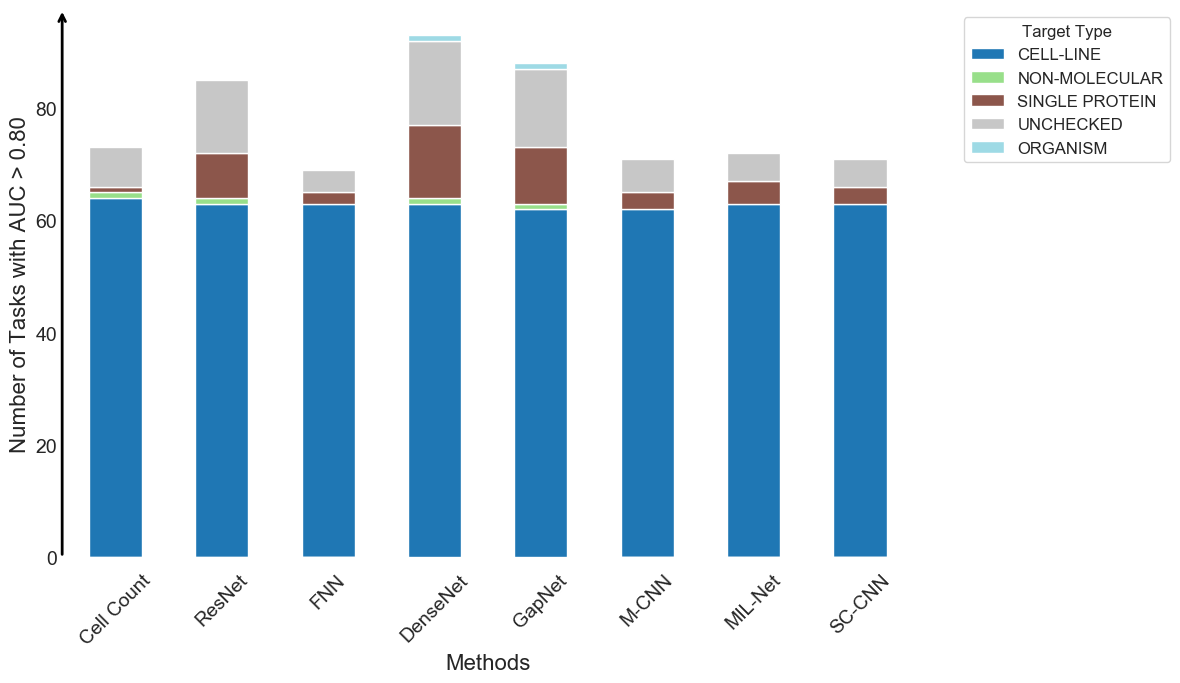

In [135]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Target_Type' does not have NaN values
detailed_results['Target_Type'] = detailed_results['Target_Type'].fillna('Unknown')

# List of methods to analyze
methods = ['Cell Count', 'ResNet', 'FNN', 'DenseNet', 'GapNet', 'M-CNN', 'MIL-Net', 'SC-CNN']

# Initialize a DataFrame to store counts
counts_df = pd.DataFrame()

# For each method, compute counts of tasks where method's value > 0.80, grouped by 'Target_Type'
for method in methods:
    # Filter tasks where method's value > 0.80
    df_filtered = detailed_results[detailed_results[method] > 0.80]
    # Group by 'Target_Type' and count
    counts = df_filtered.groupby('Target_Type').size()
    # Convert counts to a DataFrame
    counts = counts.reset_index(name=method)
    # Merge counts into counts_df
    if counts_df.empty:
        counts_df = counts
    else:
        counts_df = counts_df.merge(counts, on='Target_Type', how='outer')

# Replace NaN with zeros and set 'Target_Type' as the index
counts_df = counts_df.fillna(0).set_index('Target_Type')

# Convert counts to integers
counts_df = counts_df.astype(int)

# Transpose counts_df for plotting
counts_df_T = counts_df.transpose()

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 7))

# Plot the stacked bar chart
counts_df_T.plot(kind='bar', stacked=True, ax=ax, colormap='tab20')

# Remove top and right spines (bars)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Remove the title
# plt.title('Performance of Methods on 209 Tasks, Colored by Target Type', fontsize=14)

# Adjust font sizes and styles for a poster-style figure
plt.xlabel('Methods', fontsize=16)
plt.ylabel('Number of Tasks with AUC > 0.80', fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

# Adjust the legend
plt.legend(title='Target Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=12)

# Remove default left spine and add an arrow at the end of the left y-axis
# Hide the left spine
ax.spines['left'].set_visible(False)

# Draw an arrow along the y-axis
x_start, x_end = ax.get_xlim()
y_start, y_end = ax.get_ylim()

ax.annotate('', xy=(x_start, y_end), xycoords='data',
            xytext=(x_start, y_start), textcoords='data',
            arrowprops=dict(arrowstyle='->', lw=2, color='black'))

# Adjust y-axis ticks to match the new y-axis
ax.yaxis.set_ticks_position('none')
ax.tick_params(axis='y', which='both', length=0)

# Apply tight layout to fit everything nicely
plt.tight_layout()

# Show the plot
plt.show()


In [84]:
# List to store unique genes
unique_genes_list = []

for method in methods:
    print(method)
    # Filter tasks where the method's value > 0.80
    df_filtered = detailed_results[detailed_results[method] > 0.80]
    
    # Print Target_Type value counts
    print(df_filtered.Target_Type.value_counts())
    
    # Print unique Gene_Symbols for "SINGLE PROTEIN" Target_Type
    single_protein_genes = df_filtered[df_filtered["Target_Type"] == "SINGLE PROTEIN"].Gene_Symbol.unique()
    print(single_protein_genes)
    
    # Add unique genes to the list
    unique_genes_list.extend(single_protein_genes)

# Ensure the list is unique
unique_genes_list = list(set(unique_genes_list))
unique_genes_list

Cell Count
CELL-LINE         64
UNCHECKED          7
SINGLE PROTEIN     1
NON-MOLECULAR      1
Name: Target_Type, dtype: int64
['KDM4E']
ResNet
CELL-LINE         63
UNCHECKED         13
SINGLE PROTEIN     8
NON-MOLECULAR      1
Name: Target_Type, dtype: int64
[nan 'ATAD5' 'ATXN2' 'SMAD3' 'IDH1' 'GMNN' 'BRCA1']
FNN
CELL-LINE         63
UNCHECKED          4
SINGLE PROTEIN     2
Name: Target_Type, dtype: int64
['SMAD3' 'GMNN']
DenseNet
CELL-LINE         63
UNCHECKED         15
SINGLE PROTEIN    13
NON-MOLECULAR      1
ORGANISM           1
Name: Target_Type, dtype: int64
['MAPT' 'Hsf1' 'ATAD5' 'VDR' 'ATXN2' 'SMAD3' 'IDH1' 'GMNN' 'BRCA1' 'TDP1'
 'RAPGEF3']
GapNet
CELL-LINE         62
UNCHECKED         14
SINGLE PROTEIN    10
NON-MOLECULAR      1
ORGANISM           1
Name: Target_Type, dtype: int64
['Hsf1' 'ATAD5' 'ATXN2' 'SMAD3' 'IDH1' 'GMNN' 'BRCA1' 'RAPGEF3']
M-CNN
CELL-LINE         62
UNCHECKED          6
SINGLE PROTEIN     3
Name: Target_Type, dtype: int64
['ATXN2' 'GMNN']
MIL-Net
CELL-

[nan,
 'ATAD5',
 'KDM4E',
 'IDH1',
 'ATXN2',
 'MAPT',
 'SMAD3',
 'Hsf1',
 'VDR',
 'RAPGEF3',
 'BRCA1',
 'TDP1',
 'GMNN']

In [87]:
11/66

0.16666666666666666

In [86]:
for p in unique_genes_list: 
    print(p)

nan
ATAD5
KDM4E
IDH1
ATXN2
MAPT
SMAD3
Hsf1
VDR
RAPGEF3
BRCA1
TDP1
GMNN


In [76]:
for a in detailed_results[detailed_results.Gene_Symbol.isin(['MAPT' ,'Hsf1' ,'ATAD5', 'VDR', 'ATXN2' ,'SMAD3' ,'IDH1' ,'GMNN', 'BRCA1' ,'TDP1',
 'RAPGEF3'])].Assay_Description:
    print(a)

PUBCHEM_BIOASSAY: qHTS Assay for Inhibitors of Tyrosyl-DNA Phosphodiesterase (TDP1). (Class of assay: confirmatory) 
PUBCHEM_BIOASSAY: qHTS for Inhibitors of Tau Fibril Formation, Thioflavin T Binding. (Class of assay: confirmatory) [Related pubchem assays: 596 ]
PUBCHEM_BIOASSAY: qHTS for Inhibitors of Tau Fibril Formation, Fluorescence Polarization. (Class of assay: confirmatory) [Related pubchem assays: 596 ]
PUBCHEM_BIOASSAY: Luminescence Cell-Based Dose Retest to Identify Potentiators of Heat Shock Factor 1 (HSF1). (Class of assay: confirmatory) [Related pubchem assays (depositor defined):AID493224]
PUBCHEM_BIOASSAY: Validation screen for small molecules that induce genotoxicity in human embryonic kidney (HEK293T) cells expressing luciferase-tagged ELG1. (Class of assay: confirmatory) [Related pubchem assays (depositor defined):AID493143, AID504466]
PUBCHEM_BIOASSAY: qHTS screen for small molecules that induce genotoxicity in human embryonic kidney (HEK293T) cells expressing lucif

In [79]:
detailed_results[detailed_results.Gene_Symbol.isin(['MAPT' ,'Hsf1' ,'ATAD5', 'VDR', 'ATXN2' ,'SMAD3' ,'IDH1' ,'GMNN', 'BRCA1' ,'TDP1',
 'RAPGEF3'])].Task.unique()

array([  8,   9,  16,  47, 148, 154, 159, 160, 172, 175, 176, 182, 183,
       186, 191, 192, 206])

In [91]:
data = pd.read_csv("CP_count_Hofmarcher.csv")
data

,INCHIKEY,1,2,3,4,5,6,7,8,9,...,Cells_Neighbors_SecondClosestObjectNumber_5,Cells_Neighbors_SecondClosestObjectNumber_Adjacent,Cells_Parent_Nuclei,Cytoplasm_Number_Object_Number,Cytoplasm_Parent_Cells,Cytoplasm_Parent_Nuclei,Nuclei_Neighbors_FirstClosestObjectNumber_1,Nuclei_Neighbors_SecondClosestObjectNumber_1,Nuclei_Number_Object_Number,InChIKey
0,AACRWZVDRSTLKY-UHFFFAOYSA-N,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-0.054688,-0.054688,0.859375,0.859375,0.859375,0.859375,1.445312,1.007812,0.859375,AACRWZVDRSTLKY-UHFFFAOYSA-N
1,AACUKVXTFOXDGE-UHFFFAOYSA-N,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.171875,-1.171875,-1.148438,-1.148438,-1.148438,-1.148438,-1.101562,-1.453125,-1.148438,AACUKVXTFOXDGE-UHFFFAOYSA-N
2,AADCDMQTJNYOSS-LBPRGKRZSA-N,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-0.425781,-0.425781,0.453125,0.453125,0.453125,0.453125,-0.117188,-0.531250,0.453125,AADCDMQTJNYOSS-LBPRGKRZSA-N
3,AADORYZVGJDNSZ-UHFFFAOYSA-N,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.123188,1.123188,0.521739,0.521739,0.521739,0.521739,1.536232,0.601449,0.521739,AADORYZVGJDNSZ-UHFFFAOYSA-N
4,AAEVYOVXGOFMJO-UHFFFAOYSA-N,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-6.882812,-6.882812,-7.218750,-7.218750,-7.218750,-7.218750,-7.679688,-7.773438,-7.218750,AAEVYOVXGOFMJO-UHFFFAOYSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10568,ZZUCJGSOKDNIEZ-UHFFFAOYSA-N,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.609375,0.609375,0.679688,0.679688,0.679688,0.679688,0.757812,0.757812,0.679688,ZZUCJGSOKDNIEZ-UHFFFAOYSA-N
10569,ZZUFCTLCJUWOSV-UHFFFAOYSA-N,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-10.242188,-10.242188,-10.746094,-10.746094,-10.746094,-10.746094,-11.167969,-10.281250,-10.746094,ZZUFCTLCJUWOSV-UHFFFAOYSA-N
10570,ZZUZYEMRHCMVTB-UHFFFAOYSA-N,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-16.171875,-16.171875,-16.304688,-16.304688,-16.304688,-16.304688,-16.335938,-15.152344,-16.304688,ZZUZYEMRHCMVTB-UHFFFAOYSA-N
10571,ZZVUWRFHKOJYTH-UHFFFAOYSA-N,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-0.640625,-0.640625,-1.664062,-1.664062,-1.664062,-1.664062,-1.257812,-0.289062,-1.664062,ZZVUWRFHKOJYTH-UHFFFAOYSA-N


In [95]:
data = data[["INCHIKEY", "8",   "9",  "16",  "47", "148", "154", "159", "160", "172", "175", "176", "182", "183","186", "191", "192", "206"]]
data

,INCHIKEY,8,9,16,47,148,154,159,160,172,175,176,182,183,186,191,192,206
0,AACRWZVDRSTLKY-UHFFFAOYSA-N,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,AACUKVXTFOXDGE-UHFFFAOYSA-N,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,AADCDMQTJNYOSS-LBPRGKRZSA-N,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,AADORYZVGJDNSZ-UHFFFAOYSA-N,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0
4,AAEVYOVXGOFMJO-UHFFFAOYSA-N,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10568,ZZUCJGSOKDNIEZ-UHFFFAOYSA-N,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
10569,ZZUFCTLCJUWOSV-UHFFFAOYSA-N,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0
10570,ZZUZYEMRHCMVTB-UHFFFAOYSA-N,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
10571,ZZVUWRFHKOJYTH-UHFFFAOYSA-N,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [96]:
for col in data.columns[1:]:
    print(data[col].value_counts())

-1.0    10528
 0.0       31
 1.0       14
Name: 8, dtype: int64
-1.0    10453
 0.0       99
 1.0       21
Name: 9, dtype: int64
-1.0    10519
 0.0       42
 1.0       12
Name: 16, dtype: int64
-1.0    10485
 0.0       62
 1.0       26
Name: 47, dtype: int64
-1.0    10503
 0.0       54
 1.0       16
Name: 148, dtype: int64
-1.0    10221
 1.0      279
 0.0       73
Name: 154, dtype: int64
-1.0    10247
 1.0      228
 0.0       98
Name: 159, dtype: int64
-1.0    10519
 1.0       33
 0.0       21
Name: 160, dtype: int64
-1.0    10188
 0.0      214
 1.0      171
Name: 172, dtype: int64
-1.0    10535
 1.0       20
 0.0       18
Name: 175, dtype: int64
-1.0    9857
 1.0     517
 0.0     199
Name: 176, dtype: int64
-1.0    9793
 0.0     487
 1.0     293
Name: 182, dtype: int64
-1.0    10215
 0.0      207
 1.0      151
Name: 183, dtype: int64
-1.0    10192
 1.0      255
 0.0      126
Name: 186, dtype: int64
-1.0    8406
 1.0    2156
 0.0      11
Name: 191, dtype: int64
-1.0    8791
 1.0    1763

In [94]:
CP = pd.read_csv("../Cell_Painting_Median_Features_Median_doses.csv")

In [98]:
import pandas as pd
from rdkit import Chem
from pandarallel import pandarallel

# Initialize pandarallel
pandarallel.initialize()

# Function to convert InChI to InChIKey
def inchi_to_inchikey(inchi):
    mol = Chem.inchi.MolFromInchi(inchi)
    if mol is not None:
        return Chem.MolToInchiKey(mol)
    else:
        return None
    
# Apply the function to the dataframe in parallel
CP['InChIKey'] = CP['InChICode_standardised'].parallel_apply(inchi_to_inchikey)

INFO: Pandarallel will run on 40 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


[20:58:16] WARNING: not removing hydrogen atom without neighbors
[20:58:16] WARNING: not removing hydrogen atom without neighbors


In [127]:
CP_new = CP[["Nuclei_AreaShape_EulerNumber", "InChIKey"]]
CP_new

,Nuclei_AreaShape_EulerNumber,InChIKey
0,0.0,SXJIZQPZESTWLD-UHFFFAOYSA-N
1,0.0,NBLBCGUCPBXKOV-UHFFFAOYSA-N
2,0.0,FOLOUAULJSJVDY-GZBFAFLISA-N
3,0.0,FOLOUAULJSJVDY-IPYPFGDCSA-N
4,0.0,FOLOUAULJSJVDY-NFAWXSAZSA-N
...,...,...
30399,0.0,LHXWPDUWZAYBJV-UHFFFAOYSA-N
30400,0.0,IVYPNXXAYMYVSP-UHFFFAOYSA-N
30401,0.0,JNXMJSYJCFTLJB-SNAWJCMRSA-N
30402,0.0,LRBIKSYRCFHKBN-UHFFFAOYSA-N


In [128]:
k = pd.merge(data ,CP_new, left_on="INCHIKEY", right_on="InChIKey", how="inner")
k

,INCHIKEY,8,9,16,47,148,154,159,160,172,175,176,182,183,186,191,192,206,Nuclei_AreaShape_EulerNumber,InChIKey
0,AACRWZVDRSTLKY-UHFFFAOYSA-N,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,AACRWZVDRSTLKY-UHFFFAOYSA-N
1,AACUKVXTFOXDGE-UHFFFAOYSA-N,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,AACUKVXTFOXDGE-UHFFFAOYSA-N
2,AADCDMQTJNYOSS-LBPRGKRZSA-N,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,AADCDMQTJNYOSS-LBPRGKRZSA-N
3,AADORYZVGJDNSZ-UHFFFAOYSA-N,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,AADORYZVGJDNSZ-UHFFFAOYSA-N
4,AAEVYOVXGOFMJO-UHFFFAOYSA-N,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,AAEVYOVXGOFMJO-UHFFFAOYSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10568,ZZUCJGSOKDNIEZ-UHFFFAOYSA-N,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,ZZUCJGSOKDNIEZ-UHFFFAOYSA-N
10569,ZZUFCTLCJUWOSV-UHFFFAOYSA-N,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,ZZUFCTLCJUWOSV-UHFFFAOYSA-N
10570,ZZUZYEMRHCMVTB-UHFFFAOYSA-N,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,ZZUZYEMRHCMVTB-UHFFFAOYSA-N
10571,ZZVUWRFHKOJYTH-UHFFFAOYSA-N,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,ZZVUWRFHKOJYTH-UHFFFAOYSA-N


In [129]:
label_columns =  k.columns.to_list()[1:-2]
print(label_columns)

['8', '9', '16', '47', '148', '154', '159', '160', '172', '175', '176', '182', '183', '186', '191', '192', '206']


In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statannot import add_stat_annotation
from pandarallel import pandarallel

# Initialize pandarallel
pandarallel.initialize()

# Function to process each label
def process_label(label):
    results = []
    # Check for active and inactive compounds
    active_compounds = k[k[label] == 1]
    inactive_compounds = k[k[label] == 0]
    
    
    # Find the minimum length between the two groups
    min_length = min(len(active_compounds), len(inactive_compounds))

    # Sample both groups to the minimum length
    active_compounds = active_compounds.sample(n=min_length, random_state=42)
    inactive_compounds = inactive_compounds.sample(n=min_length, random_state=42)

    # Ensure there are more than one active and inactive compounds
    if len(active_compounds) > 1 and len(inactive_compounds) > 1:
        # Add the active compounds' values
        for value in active_compounds['Nuclei_AreaShape_EulerNumber']:
            results.append({'Label': label, 'Status': 'Active', 'Value': value})
        
        # Add the inactive compounds' values
        for value in inactive_compounds['Nuclei_AreaShape_EulerNumber']:
            results.append({'Label': label, 'Status': 'Inactive', 'Value': value})
    
    return results

# Use pandarallel to process all labels in parallel
distribution_results = pd.Series(label_columns).parallel_apply(process_label)

# Flatten the list of lists
distribution_results = [item for sublist in distribution_results for item in sublist]

# Convert results to DataFrame
distribution_df = pd.DataFrame(distribution_results)
distribution_df

INFO: Pandarallel will run on 40 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


,Label,Status,Value
0,8,Active,0.0
1,8,Active,0.0
2,8,Active,0.0
3,8,Active,0.0
4,8,Active,0.0
...,...,...,...
2565,206,Inactive,0.0
2566,206,Inactive,0.0
2567,206,Inactive,0.0
2568,206,Inactive,0.0


In [131]:
distribution_df.groupby(["Label"]).Status.value_counts()

# Grouping by Label and Status, then counting the occurrences
status_counts = distribution_df.groupby(["Label"]).Status.value_counts().unstack().fillna(0)

# Sorting the DataFrame to show active before inactive
status_counts = status_counts.reindex(columns=["Active", "Inactive"])
status_counts.sort_values(by="Active")

Status,Active,Inactive
Label,,
191,11,11
16,12,12
8,14,14
148,16,16
206,16,16
175,18,18
192,19,19
9,21,21
160,21,21


In [132]:
df = distribution_df.groupby(["Label", "Status"]).mean().reset_index()
df

,Label,Status,Value
0,148,Active,0.000000
1,148,Inactive,0.000000
2,154,Active,0.000107
3,154,Inactive,0.000107
4,159,Active,0.000159
5,159,Inactive,0.000159
6,16,Active,0.000000
7,16,Inactive,0.000000
8,160,Active,0.000000
9,160,Inactive,0.000000


In [133]:
df.groupby("Status").mean()

,Value
Status,
Active,0.000068
Inactive,0.000118


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Active v.s. Inactive: t-test independent samples with Bonferroni correction, P_val=3.401e-01 stat=-9.684e-01


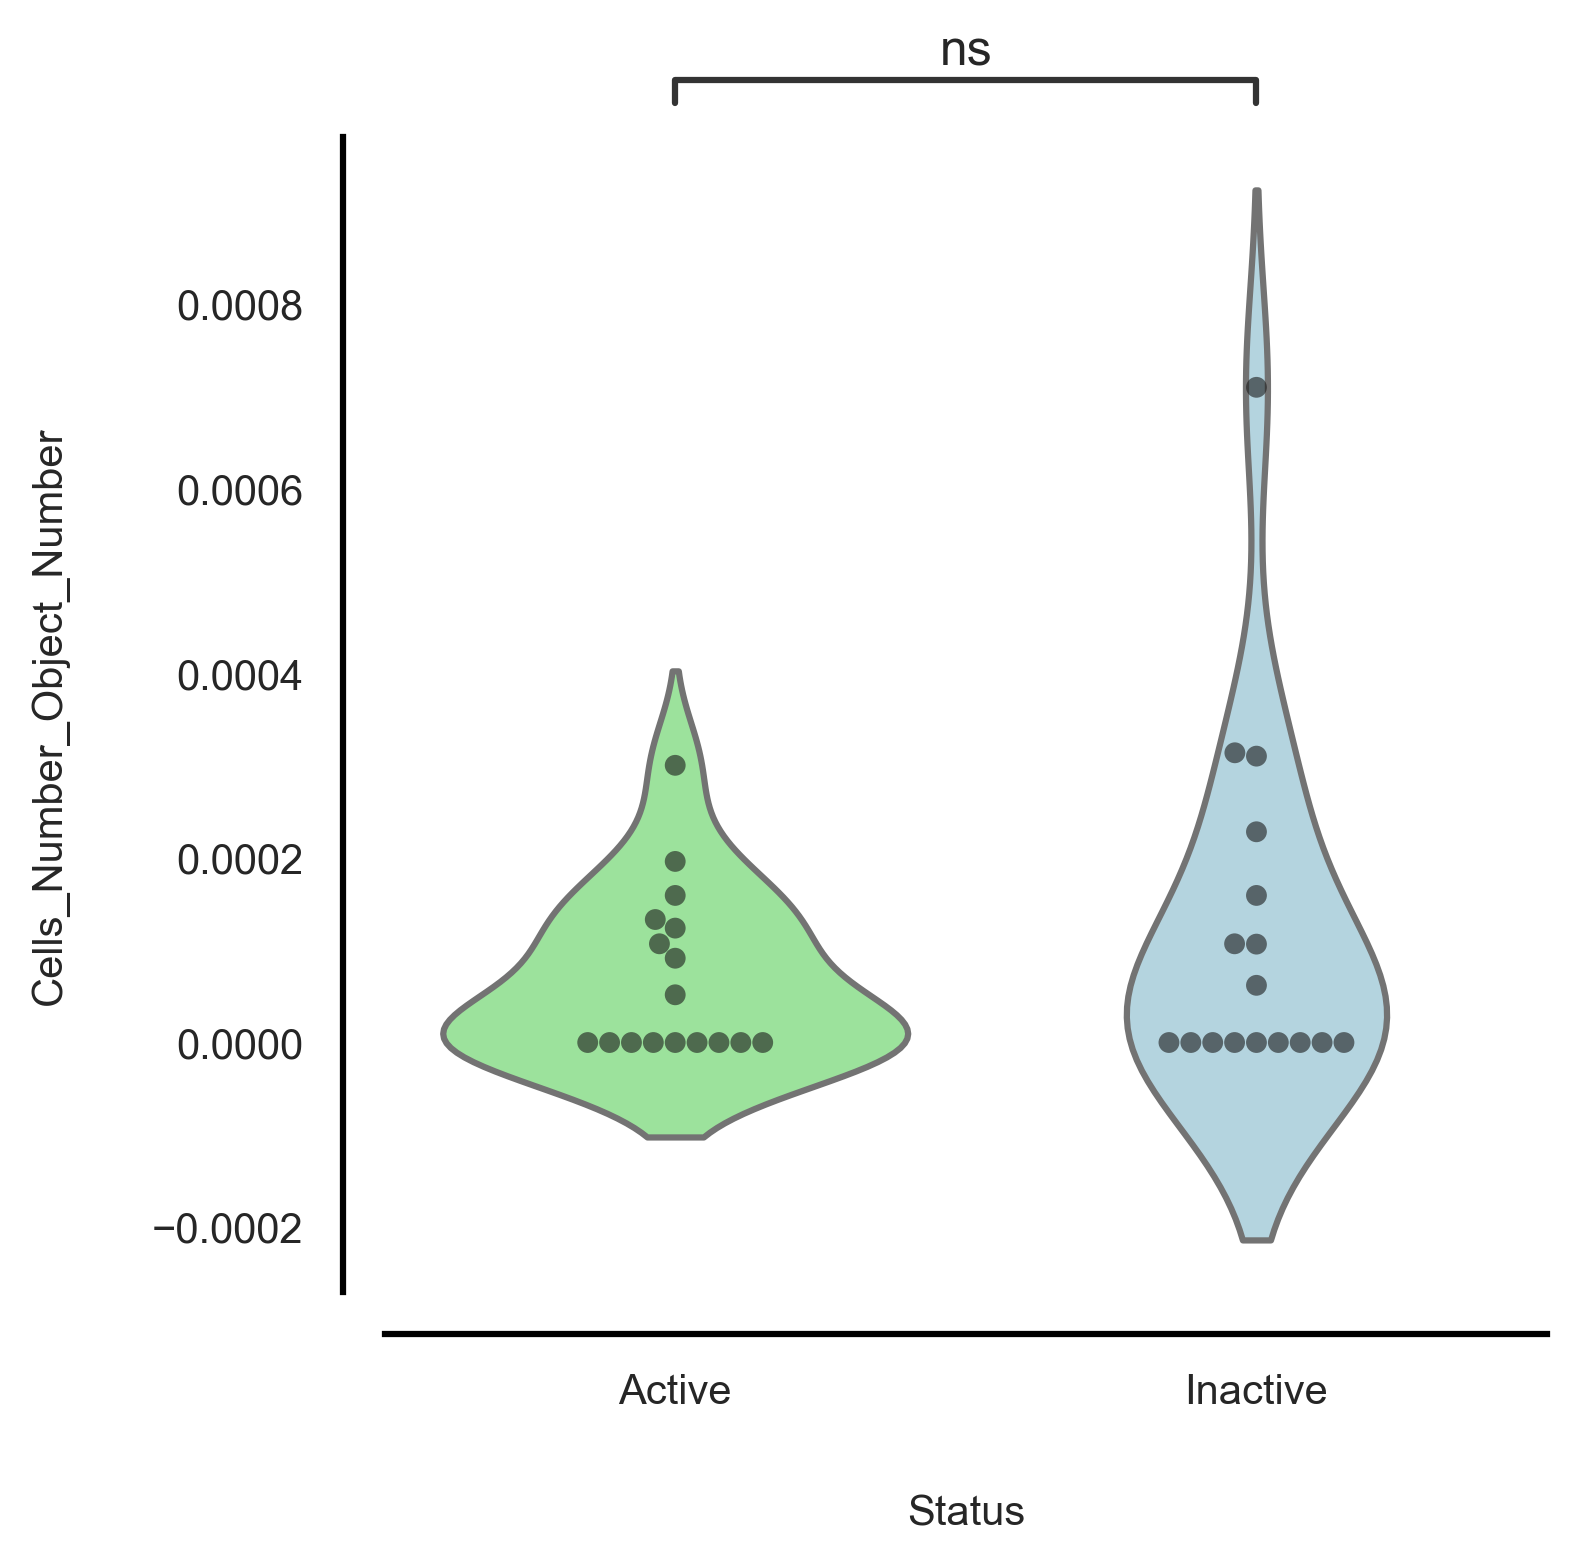

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation  # Ensure this library is installed: pip install statannot

# Set the context to "poster" for larger fonts
sns.set_context("poster", font_scale=1.5)  # Adjust font_scale to increase/decrease the size further

# Set the style to white and remove edge colors
sns.set(style="white", rc={"axes.edgecolor": "none"})

# Create a large figure
plt.figure(figsize=(5, 5), dpi=300)

# Creating the violin plot
ax = sns.violinplot(data=df, x='Status', y='Value', palette={'Active': 'lightgreen', 'Inactive': 'lightblue'}, inner=None)

# Adding the swarm plot on top of the violin plot
sns.swarmplot(data=df, x='Status', y='Value', color='k', alpha=0.6)

# Adding statistical annotations
add_stat_annotation(ax, data=df, x='Status', y='Value',
                    box_pairs=[("Active", "Inactive")],
                    test='t-test_ind', text_format='star', loc='outside', verbose=2)

# Removing the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Customizing the appearance of the left and bottom spines
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position(('outward', 10))
    ax.spines[spine].set_linewidth(1.5)
    ax.spines[spine].set_color('black')

# Increasing label font sizes
ax.set_xlabel('Status', fontsize=10, labelpad=20)
ax.set_ylabel('Cells_Number_Object_Number', fontsize=10, labelpad=20)

# Adjusting tick parameters for larger font size on both axes
ax.tick_params(axis='both', which='major', labelsize=10)  # Major ticks
ax.tick_params(axis='both', which='minor', labelsize=10)  # Minor ticks (if used)

# Showing the plot
plt.show()
